<p>&nbsp;</p>
</p><h1 style="text-align: center;"><strong>Detec&ccedil;&atilde;o automatizada de Fake News</strong></h1>
<h1 style="text-align: center;"><strong>e o problema da linguagem ofensiva</strong></h1>
<h1 style="text-align: center;"><strong>e &oacute;dio</strong></h1>
<p>&nbsp;</p><p>&nbsp;</p>

</p><h4 style="text-align: center;"><strong>Proposta de Tema para Trabalho de Conclusão do Curso de Especialização em Ciência de Dados.</strong></h4>

</p><h3 style="text-align: center;"><strong>Faculdade de Engenharia de Sorocaba</strong></h3>

Proposto por:

Alex Cozer Abrantes RA:183150

Bruno Alves Comitre RA:183141

***

# Glossário

<ul>
    <li><a href='#analise_exploratoria'>1. Análise Explorátoria</a></li>
    <ul>
        <li><a href='#imports'>1.1 Imports</a></li>
        <li><a href='#leitura_dataset'>1.2 Leitura do Dataset</a></li>
        <li><a href='#classificacao_features'>1.3 Classificação das Features</a></li>
        <li><a href='#dicionario_dados'>1.4 Dicionário dos Dados</a></li>
        <li><a href='#analise_dados'>1.5 Análise dos Dados</a></li>
        <li><a href='#dados_faltantes'>1.6 Dados Faltantes</a></li>
        <li><a href='#dados_desiquilibrados'>1.7 Dados Desiquilibrados e Random Shuffle</a></li>
        <li><a href='#novas_features'>1.8 Novas Features</a></li>
        <li><a href='#analise_grafica'>1.9 Análise Gráfica</a></li>
        <ul>
            <li><a href='#wordcloud'>1.9.1 WordCloud</a></li>
            <li><a href='#histograma'>1.9.2 Histograma</a></li>
            <ul>
                <li><a href='#histo_titulo'>1.9.2.1 Histograma dos Títulos</a></li>
                <li><a href='#histo_texto'>1.9.2.2 Histograma dos Textos</a></li>
            </ul>
            <li><a href='#boxplot'>1.9.3 Diagrama de Caixa</a></li>
            <ul>
                <li><a href='#boxplot_titulo'>1.9.3.1 Diagrama de Caixa dos Títulos</a></li>
                <li><a href='#boxplot_texto'>1.9.3.2 Diagrama de Caixa dos Textos</a></li>
            </ul>
            <li><a href='#analise_palavras'>1.9.4 Análise por Palavras</a></li>
            <ul>
                <li><a href='#advérbios_adjetivos'>1.9.4.1 Advérbios / Adjetivos</a></li>
            </ul>
            <li><a href='#matriz_correlacao'>1.9.5 Matriz de correlação</a></li>
        </ul>
    </ul>
</ul>

<a id='analise_exploratoria'></a>
# 1. Análise Explorátoria:

Nesta fase do trabalho, inicialmente, faz necessário a aplicação de técnicas para manusear valores faltantes e fazer transformações de variáveis. Os dados serão ajustados e estreitando os presupostos para empregar técnicas gráficas e quantitativas, visando maximizar a obtenção de informações, tendências e detectação decomportamentos.

<a id='imports'></a>
## 1.1 Imports

In [1]:
!pip install names

import numpy as np
import pandas as pd
import csv
import random 
import pandas_profiling #conda install -c conda-forge pandas-profiling
import names #pip install names
import nltk
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from pandas.io.json import json_normalize
from plotly import tools

<a id='leitura_dataset'></a>
## 1.2 Leitura do Dataset

In [3]:
# Train Dataset
## arquivo disponivel em: https://drive.google.com/drive/folders/1LqNzxY8l0EgznlCD-g873VD-ys1BRN2-?fbclid=IwAR3PPLu4hgNdKfQDJzrLGwV6L42Vm3xBrrcquuCOR4ySS97bVvU46JDaR2s
# train_data = pd.read_csv('../input/train.csv')
train_data = pd.read_csv('train.csv')
train_data = train_data.sample(frac = 1) # Randomly Smaple data, ratio is 100%
train_data.head()

,id,title,author,text,label
6405,6405,Trump Warns House Republicans: Repeal Health L...,"Julie Hirschfeld Davis, Thomas Kaplan and Robe...",WASHINGTON — President Trump on Tuesday tur...,0
19257,19257,Vatican Makes Unprecedented Agreement With Chi...,Alex Ansary,Vatican Makes Unprecedented Agreement With Chi...,1
6647,6647,Study: Extreme Protest Tactics Reduce Support ...,Tom Ciccotta,A study conducted at the University of Toronto...,0
7450,7450,Uncertainty Over New Chinese Law Rattles Forei...,Chris Buckley,"BEIJING — The hotline rings, but nobody ans...",0
20105,20105,"As The Monetary Madness Continues, What Is Hap...",King World News,5 King World News \nAs the monetary madness ...,1


<a id='classificacao_features'></a>
## 1.3 Classificação das Features

In [7]:
table = [["id","Nominal Qualitativo"],["title","Nominal Qualitativo"],
         ["author","Nominal Qualitativo"],["text","Nominal Qualitativo"],
         ["label","Quantitativo Discreto"]]

filing = pd.DataFrame(table, columns=["Variável", "Classificação"])
filing

,Variável,Classificação
0,id,Nominal Qualitativo
1,title,Nominal Qualitativo
2,author,Nominal Qualitativo
3,text,Nominal Qualitativo
4,label,Quantitativo Discreto


<a id='dicionario_dados'></a>
## 1.4 Dicionário dos dados

O Dataset "fake news" contém as seguintes informações:


- **ID:** id único da notícia


- **TITLE:** título da notícia


- **AUTHOR:** autor da notícia


- **TEXT:** texto da notícia


- **LABEL:** rótulo que marca se a notícia é potencialmente não confiável
 - 1: não confiável
 - 0: confiável

<a id='analise_dados'></a>
## 1.5 Análise dos dados

Ao importar os dados, é importante entender e identificar o intervalo de preditores específicos, identificar o tipo de dados de cada preditor, bem como calcular o número ou a porcentagem de valores omissos para cada preditor. Usaremos a biblioteca pandas_profiling, que fornece muitas funções extremamente úteis para a análise exploratória de dados.

Observação: Foi retitado para demonstração a aleatoriedade dos dados

In [8]:
train_data_profiling = pd.read_csv('../input/train.csv')

In [9]:
profile = pandas_profiling.ProfileReport(train_data_profiling)
display(profile)

##### Informações:

Acima temos todas as informações referente ao conjunto de dados, desde seu tamanho, espaço, e tipos de variáveis.

Podemos perceber que em relação a dados faltantes temos em torno de 10% de falta no conjunto de dados e suas variáveis contém desde informações de frequência quanto contagem e composição das palavras.

Também podemos ver a correlação entre elas, que tanto Person, Spearman, Kendall, e Phik alternam entre 0 e 1.

Por se tratar de texto os mapas de Matrix, count, haetmap, e dendrogam, não troxeram nenhum insight para a análise.

<a id='dados_faltantes'></a>
## 1.6 Dados Faltantes

A falta de dados pode afetar a análise e o treinamento, que poderá levar a falhas no aprendizado. Então, é possível dizer se há dados ausentes no conjunto de dados? Sim, pelo relatório gerado por pandas_profiting, identificou-se:

O título do atributo tem 558 amostras (2,68%) com valores ausentes.
O autor do atributo possui 1957 amostras (9,41%) com valores ausentes.
O texto do atributo tem 39 amostras (0,19%) com valores ausentes.

Como existe dados faltantes nas 3 features do dataset (title, Author e Text) eliminar as linhas em que há dados ausentes neste caso é a melhor opção para não comprometer a análise e o treimento.

In [10]:
print('Antes do dropna tínhamos {} registros'.format(train_data.shape[0]))
train_data.dropna(inplace=True)
print('Depois do dropna temos {} registro'.format(train_data.shape[0]))

Antes do dropna tínhamos 20800 registros
Depois do dropna temos 18285 registro


<a id='dados_desiquilibrados'></a>
## 1.7 Dados Desiquilibrados e Random Shuflle

Após eliminar as linhas de dados faltantes, aplicou-se uma análise descritiva para verificar se houve desequilíbrio nos dados, constatou-se que a média de 43% da feature Label, na qual armazena valores de 0 ou 1 (não confiáveis e confiáveis) mostra que os dados estão em desequilibrio, constando uma diferença de 2437 registros com o valor 1 (confiáveis) a mais que o valor 0 (não confiáveis). Para manter o conjunto de dados equilibrado aplicou-se o Random Shuffle nos registros com valor 1 (confiáveis) considerando o valor de 7924 registros que é o número total de dados (não confiáveis). 

In [11]:
train_data.label.describe()

count    18285.000000
mean         0.433361
std          0.495553
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: label, dtype: float64

In [12]:
unreliable = train_data[train_data['label'] == 1]
print('Não confiável：', len(unreliable))

reliable = train_data[train_data['label'] == 0]
print('Confiável：', len(reliable))

print('Desequilibrio nos dados de {} registros confiáveis'.format(len(reliable) - len(unreliable)))

Não confiável： 7924
Confiável： 10361
Desequilibrio nos dados de 2437 registros confiáveis


In [13]:
## aplicando Random Shuffle
mean = min(len(unreliable), len(reliable))

un_data = unreliable.sample(n = mean)
print('Não confiável：', len(un_data))
r_data = reliable.sample(n = mean)
print('Confiável：', len(r_data))

train_data = pd.concat([un_data, r_data])

Não confiável： 7924
Confiável： 7924


<a id='novas_features'></a>
## 1.8 Novas Features

Por fim, após os tratamentos dos dados, identificou-se a necessidade de criar feateares, que armazenarão os dados de:

* Concatenação do Título + Autor + Texto

* Tokens das strings Titulo (title)
* Tokens das strings Autor (author)
* Tokens das strings Texto (text)
* Tokens das strings Concatenação do Título + Autor + Texto

* Tamanho Total da Concatenação do Título + Autor + Texto
* Tamanho Total Titulo (title)
* Tamanho Total Autor (author)
* Tamanho Total Texto (text)
* Tamanho Total dos Tokens das strings Titulo (title)
* Tamanho Total dos Tokens das strings Autor (author)
* Tamanho Total dos Tokens das strings Texto (text)

Essas novas features serão utilizadas nas análises gráficas e no treinamento dos dados em Keras.

In [14]:
tokenizer = RegexpTokenizer(r'\w+')

train_data['title_author_text'] = train_data['title'] + ' ' + train_data['author'] + ' ' + train_data['text']

train_data['token_title'] = [tokenizer.tokenize(x.lower()) for x in train_data['title']]
train_data['token_author'] = [tokenizer.tokenize(x.lower()) for x in train_data['author']]
train_data['token_text'] = [tokenizer.tokenize(x.lower()) for x in train_data['text']]
train_data['token_title_author_text'] = [tokenizer.tokenize(x.lower()) for x in train_data['title_author_text']]

train_data['len_title'] = [len(x) for x in train_data['title']]
train_data['len_author'] = [len(x) for x in train_data['author']]
train_data['len_text'] = [len(x) for x in train_data['text']]
train_data['len_title_author_text'] = [len(x) for x in train_data['title_author_text']]

train_data['len_token_title'] = [len(x) for x in train_data['token_title']]
train_data['len_token_author'] = [len(x) for x in train_data['token_author']]
train_data['len_token_text'] = [len(x) for x in train_data['token_text']]
train_data['len_token_title_author_text'] = [len(x) for x in train_data['token_title_author_text']]

<a id='novas_features'></a>
## 1.9 Análise Gráfica

<ul>
    <li>Gerar um WordCloud com todos os textos</li>
    <li>Será que existe diferença de tamanho (caracteres) dos textos confiáveis e não confiáveis?</li>
    <li>Podemos verificar alguma correlação Tamanho x Avaliação?</li>
    <li>A forma de escrita do texto (exemplos: educado, rude, gírias, etc…) tem influência no sentimento Confiável e Não Confiável?</li>
    <li>Criar um histograma referente ao tamanho dos texto</li>
</ul>

<a id='wordcloud'></a>
### 1.9.1 WordCloud

No handles with labels found to put in legend.


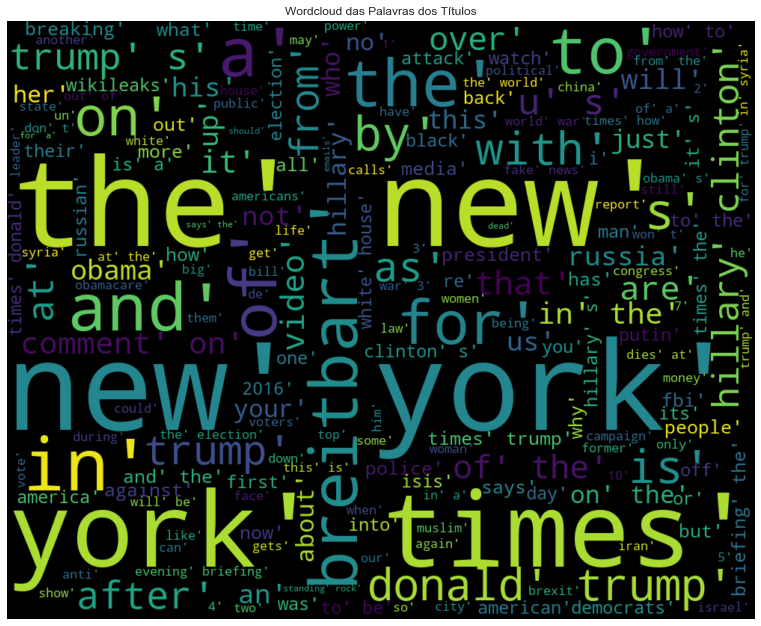

In [15]:
## Carregando a lista de stopwords
stopwords = nltk.corpus.stopwords.words('english')

## words referente a feature title
words = []
for p in train_data['token_title']:
    if p not in stopwords:
        words.append(p)

words = str(words)
            
## parametro do wordcloud
wordcloud = WordCloud(width=1000, height=800, margin=0)
wordcloud.generate(words)
    
## plotagem
plt.figure(figsize=(20,11))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0,y=0)
plt.title('Wordcloud das Palavras dos Títulos')
plt.legend()

##### Informações:

Aqui podemos ver o conjunto de palavras que mais aparecem no conjunto de dados, e quanto mais vezes a palavra aparece, mais grande ela é na imagem.

<a id='histograma'></a>
### 1.9.2 Histograma

<p>A construção de histogramas tem caráter preliminar em qualquer estudo e é um importante indicador da distribuição de dados. Neste estudo utiliza-se a frequência absoluta, que é o número que representa a quantidade de dados em uma determinada amostra ou o intervalo de classe especifico, indicando a frequência (absoluta) com que uma classe aparece no conjunto de dados.</p>
<p>A seguir, os gráficos abaixo representam os histogramas de Títulos e Textos. Estes gráficos facilitam no entendimento e na analise da existência de influência na avaliação: Confiável ou Não Confiável.</p>



In [16]:
unreliable = train_data[train_data['label'] == 1]
reliable = train_data[train_data['label'] == 0]

labels = ['Não Confiáveis','Confiáveis']
colors = ['#fb7082','#80b1d3']

<a id='histo_titulos'></a>
#### 1.9.2.1 Histograma dos Títulos

C:\Users\cliente\Anaconda3\envs\University\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning:


The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.



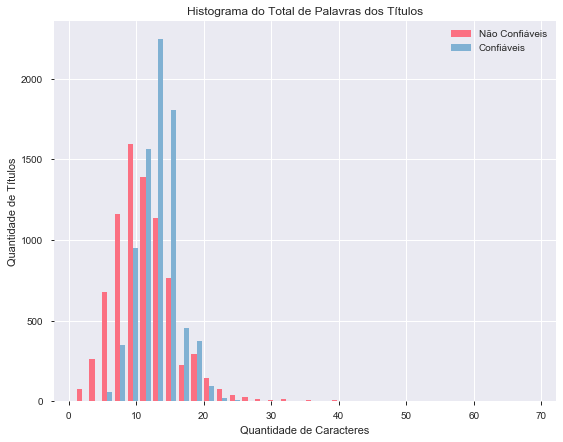

In [17]:
plt.figure(figsize=(9,7))
plt.hist([unreliable.len_token_title,reliable.len_token_title], bins=int(180/5), normed=False, color = colors, label=labels)
plt.xlabel('Quantidade de Caracteres')
plt.ylabel('Quantidade de Títulos')
plt.title('Histograma do Total de Palavras dos Títulos')
plt.legend()

##### Informações:

Em Histogramas por títulos podemos deduzir que não há relação referente a quantidade de palavras vs a confiabilidade do assunto, pois, uma vez que nem sempre a quantidade de titulos influencia na confiabilidade ou em relação na quantidade de caracteres.

<a id='histo_textos'></a>
#### 1.9.2.2 Histograma dos Textos

C:\Users\cliente\Anaconda3\envs\University\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning:


The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.



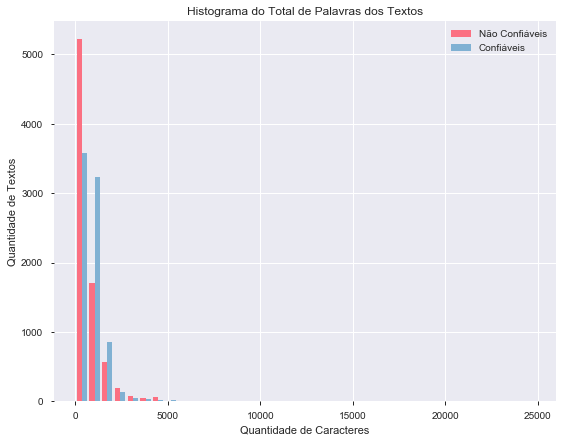

In [18]:
plt.figure(figsize=(9,7))
plt.hist([unreliable.len_token_text,reliable.len_token_text], bins=int(180/5), normed=False, color = colors, label=labels)
plt.xlabel('Quantidade de Caracteres')
plt.ylabel('Quantidade de Textos')
plt.title('Histograma do Total de Palavras dos Textos')
plt.legend()

##### Informações:

Aqui podemos observar que junto a questão acima, o tamanho do texto não influencia na sua connfiabilidade, visto que quanto mais textos com menos palavras, mais tendecioso a não ser confiavel ele era.

<a id='boxplot'></a>
### 1.9.3 Diagrama de Caixa

O diagrama de caixa é construído utilizando as referências de valores mínimos e máximos, primeiro e terceiro quartil, mediana e os outliers da base de dados. Diferentemente do histograma que é melhor para visualização de média e desvio padrão, o diagrama de caixa têm como objetivo estudar as medidas estatística e identificar os valores atípicos dentro do conjunto de dados.

<a id='boxplot_titulo'></a>
#### 1.9.3.1 Diagrama de Caixa dos Títulos

In [19]:
confiavel = go.Box(y=reliable.len_token_title, name = 'confiável', boxmean=True)
nao_confiavel = go.Box(y=unreliable.len_token_title, name = 'não confiávels', boxmean=True)
data = [confiavel, nao_confiavel]
layout = go.Layout(title = "Diagrama de Caixa do Total de Palavras dos Títulos")
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

<a id='boxplot_texto'></a>
#### 1.9.3.2 Diagrama de Caixa dos Textos

In [20]:
confiavel = go.Box(y=reliable.len_token_text, name = 'confiável', boxmean=True)
nao_confiavel = go.Box(y=unreliable.len_token_text, name = 'não confiávels', boxmean=True)
data = [confiavel, nao_confiavel]
layout = go.Layout(title = "Diagrama de Caixa do Total de Palavras dos Textos")
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

<a id='analise_palavras'></a>
### 1.9.4 Análise por Palavras

In [21]:
py.init_notebook_mode(connected=True)
pd.options.mode.chained_assignment = None
np.random.seed(13)

color = sns.color_palette()
%matplotlib inline

from tqdm import tqdm
print("Geração de recursos baseados em contagem de palavras")
for df in ([train_data]):
    df['comprimento'] = df['title'].apply(lambda x : len(str(x)))
    df['num_exclamação'] = df['title'].apply(lambda comment: str(comment).count('!'))
    df['num_questao'] = df['title'].apply(lambda comment: str(comment).count('?')) 
    df['num_puntuacao'] = df['title'].apply(lambda comment: sum(str(comment).count(w) for w in '.,;:'))                                           
    df['num_simbolo'] = df['title'].apply(lambda comment: sum(str(comment).count(w) for w in '*&$%'))                                           
    df['num_palavras'] = df['title'].apply(lambda comment: len(str(comment).split()))                                         
    df['num_palavras_unicas'] = df['title'].apply(lambda comment: len(set(w for w in str(comment).split())))                                      
    df['palavras_vs_unico'] = df['num_palavras_unicas'] / df['num_palavras']

train_data[train_data.columns[2:]].head(8)

Geração de recursos baseados em contagem de palavras


,author,text,label,title_author_text,token_title,token_author,token_text,token_title_author_text,len_title,len_author,...,len_token_text,len_token_title_author_text,comprimento,num_exclamação,num_questao,num_puntuacao,num_simbolo,num_palavras,num_palavras_unicas,palavras_vs_unico
18508,Anonymous Activist,The holiday season is just around the corner a...,1,21 Most Dangerous Islands in the World Anonymo...,"[21, most, dangerous, islands, in, the, world]","[anonymous, activist]","[the, holiday, season, is, just, around, the, ...","[21, most, dangerous, islands, in, the, world,...",38,18,...,38,47,38,0,0,0,0,7,7,1.000000
10398,Author,Region: USA in the World Even though The Ameri...,1,Does Obama have a Brilliant Career Ahead of Hi...,"[does, obama, have, a, brilliant, career, ahea...",[author],"[region, usa, in, the, world, even, though, th...","[does, obama, have, a, brilliant, career, ahea...",70,6,...,711,724,70,0,1,0,0,13,13,1.000000
18409,King World News,68 King World News \nOn the heels of a conti...,1,Michael Oliver – Another Look At The Big Pictu...,"[michael, oliver, another, look, at, the, big,...","[king, world, news]","[68, king, world, news, on, the, heels, of, a,...","[michael, oliver, another, look, at, the, big,...",79,15,...,1109,1125,79,0,0,0,0,14,14,1.000000
9975,James Hall,"in: Corporate Takeover , Economy & Business , ...",1,Economic Nationalism: Alternative To Globalism...,"[economic, nationalism, alternative, to, globa...","[james, hall]","[in, corporate, takeover, economy, business, g...","[economic, nationalism, alternative, to, globa...",46,10,...,1016,1023,46,0,0,1,0,5,5,1.000000
1723,Admin - Orissa,Idaho Mom Loses Two Children for Using Medical...,1,Idaho Mom Loses Two Children for Using Medical...,"[idaho, mom, loses, two, children, for, using,...","[admin, orissa]","[idaho, mom, loses, two, children, for, using,...","[idaho, mom, loses, two, children, for, using,...",72,14,...,991,1005,72,0,0,0,0,12,12,1.000000
2367,BareNakedIslam,BNI Store Oct 30 2016 GERMAN ‘GESTAPO’ conside...,1,GERMAN ‘GESTAPO’ considers prosecuting parents...,"[german, gestapo, considers, prosecuting, pare...",[barenakedislam],"[bni, store, oct, 30, 2016, german, gestapo, c...","[german, gestapo, considers, prosecuting, pare...",109,14,...,365,385,109,0,0,0,0,19,17,0.894737
12608,Bob Adelmann,"Videos Thursday, 03 November 2016 Hillary Clin...",1,"Hillary Clinton: ""I'm Sick and Tired of the Ne...","[hillary, clinton, i, m, sick, and, tired, of,...","[bob, adelmann]","[videos, thursday, 03, november, 2016, hillary...","[hillary, clinton, i, m, sick, and, tired, of,...",120,12,...,632,653,120,0,0,4,0,18,16,0.888889
20550,Steve Byas,Email \n“I’m trying to make this campus more a...,1,Fresno State Student Transitions to a Male Ste...,"[fresno, state, student, transitions, to, a, m...","[steve, byas]","[email, i, m, trying, to, make, this, campus, ...","[fresno, state, student, transitions, to, a, m...",42,10,...,1288,1297,42,0,0,0,0,7,7,1.000000


<a id='advérbios_adjetivos'></a>
#### 1.9.4.1 Advérbios / Adjetivos

In [22]:
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
import nltk
nltk.download('averaged_perceptron_tagger')

def tag_part_of_speech(text):
    text_splited = text.split(' ')
    text_splited = [''.join(c for c in s if c not in string.punctuation) for s in text_splited]
    text_splited = [s for s in text_splited if s]
    pos_list = pos_tag(text_splited)
    noun_count = len([w for w in pos_list if w[1] in ('NN','NNP','NNPS','NNS')])
    adjective_count = len([w for w in pos_list if w[1] in ('JJ','JJR','JJS')])
    verb_count = len([w for w in pos_list if w[1] in ('VB','VBD','VBG','VBN','VBP','VBZ')])
    return[noun_count, adjective_count, verb_count]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\cliente\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [23]:
print("Gerando POS Features")
for df in ([train_data]):
    df['substantivos'], df['adjetivos'], df['verbos'] = zip(*df['title'].apply(lambda comment: tag_part_of_speech(str(comment))))
    df['substantivos_vs_comprimento'] = df['substantivos'] / df['comprimento']
    df['adjetivos_vs_comprimento'] = df['adjetivos'] / df['comprimento']
    df['verbos_vs_comprimento'] = df['verbos'] /df['comprimento']
    df['substantivos_vs_palavras'] = df['substantivos'] / df['num_palavras']
    df['adjetivos_vs_palavras'] = df['adjetivos'] / df['num_palavras']
    df['verbos_vs_palavras'] = df['verbos'] / df['num_palavras']
    
    # Mais recursos úteis
    df["countagem_palavras_title"] = df["author"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
    df["media_palavras_len"] = df["author"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
    df['por_cento']= df['num_puntuacao']*100/df['num_palavras']
    
train_data[['substantivos','substantivos_vs_comprimento','adjetivos_vs_comprimento','verbos_vs_comprimento','substantivos_vs_palavras','adjetivos_vs_palavras','verbos_vs_palavras']].head(8)

Gerando POS Features


,substantivos,substantivos_vs_comprimento,adjetivos_vs_comprimento,verbos_vs_comprimento,substantivos_vs_palavras,adjetivos_vs_palavras,verbos_vs_palavras
18508,2,0.052632,0.052632,0.000000,0.285714,0.285714,0.000000
10398,9,0.128571,0.000000,0.014286,0.692308,0.000000,0.076923
18409,9,0.113924,0.000000,0.000000,0.642857,0.000000,0.000000
9975,3,0.065217,0.021739,0.000000,0.600000,0.200000,0.000000
1723,7,0.097222,0.000000,0.027778,0.583333,0.000000,0.166667
2367,6,0.055046,0.009174,0.045872,0.315789,0.052632,0.263158
12608,13,0.108333,0.000000,0.000000,0.722222,0.000000,0.000000
20550,5,0.119048,0.000000,0.000000,0.714286,0.000000,0.000000


<a id='matriz_correlacao'></a>
### 1.9.5 Matriz de correlação

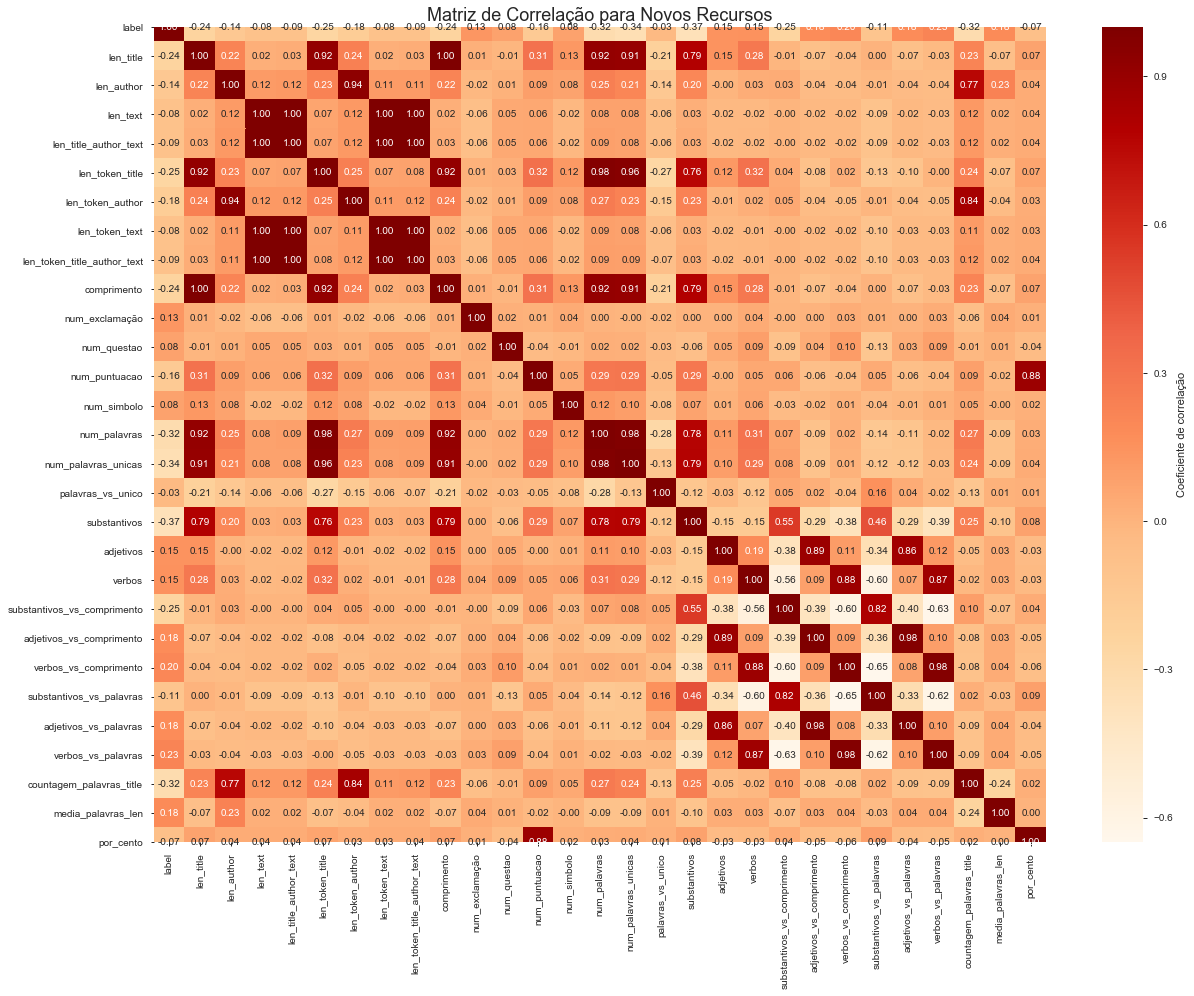

In [24]:
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(train_data.drop(['id','title'], axis=1).corr(), annot=True, fmt=".2f", ax=ax, 
            cbar_kws={'label': 'Coeficiente de correlação'}, cmap='OrRd')
ax.set_title("Matriz de Correlação para Novos Recursos", fontsize=18)
plt.show()

##### Informações:

No mapa de calor podemos ter uma noção de qual approach, que qual abordagem iriamos analisar em nosso estudo de aprendizado de máquina.

Foi criado informações como recursos baseados em contagem de palavras. Seja no seu comprimentoe título. E seus números de exclamação, questão, e puntuação referente ao título entre palavra e palavra únicas.

E também gerado as POS (part of speech) Features. Significa marcar as palavras em uma frase como substantivos, adjetivos, verbos, entre oustros. Ainda mais impressionante pelo fato de podermos relacionare com o número de palavras, fazendo assim com que relacionassemos a porcentagem dessas informações.

Com isso, nota-se o padrão de uso de substantivos e adjetivos, relacionados e titulos de determinados autores, ao qual, especificos trechos ou tamanhos poderiam demonstrar que os textos tendêm a ser não confiáveis.

# Referências

https://www.kaggle.com/shaz13/feature-engineering-for-nlp-classification/notebook#Tagging-Parts-Of-Speech-And-More-Feature-Engineering..